## *Лабораторная работа № 1*
### *«Проверка гипотезы о законе распределения генеральной совокупности»*
В результате опыта была получена выборочная совокупность.

Задание:
1. Составить вариационный ряд.
2. Построить интервальный статистический ряд.
3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот,
4. Построить график эмпирической функции распределения.
5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
7. Найти оценки параметров предполагаемого распределения генеральной совокупности.
8. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
9. Проверить выполнение правила «трех сигма».
10. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
11. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

#### Вариант 14
18,5; 19,0; 20,6; 18,4; 18,3; 19,2 18,5; 20,3; 18,6; 20,6; 18,5; 18,3; 19,1; 21,0; 18,6; 19,1; 18,4; 19,9; 18,7; 19,5; 18,4; 21,6; 18,9; 19,5; 20,1; 19,4; 19,0; 19,2; 19,7; 19,9; 19,5; 20,0; 18,4; 18,3; 19,6; 18,8; 23,1; 19,6; 18,5; 20,7; 18,7; 18,7; 22,8; 18,9; 20,2; 19,0; 19,2; 19,6; 18,9; 20,3; 21,0; 18,9; 20,3; 18,3; 19,5; 18,5;18,5; 18,6; 19,3; 18,6.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy import stats
from scipy.stats import chi2, norm

In [146]:
data = [1012, 1512, 2111, 2214, 2555, 2825, 3116, 3277, 3375, 3617, 3712, 3714, 3822, 3833, 4144, 4255, 4466, 4577, 4588, 4665, 4699, 4766, 4955, 4977, 5456, 5468, 5586, 5766, 5788, 5964, 5999, 5373, 6472, 6667, 6776, 7187, 7273, 7437]
print(f"Начальная выборка: {data}")

Начальная выборка: [1012, 1512, 2111, 2214, 2555, 2825, 3116, 3277, 3375, 3617, 3712, 3714, 3822, 3833, 4144, 4255, 4466, 4577, 4588, 4665, 4699, 4766, 4955, 4977, 5456, 5468, 5586, 5766, 5788, 5964, 5999, 5373, 6472, 6667, 6776, 7187, 7273, 7437]


# 1. Составить вариационный ряд

In [147]:
variation_series = sorted(data)
print(f"Вариационный ряд: {variation_series}")

Вариационный ряд: [1012, 1512, 2111, 2214, 2555, 2825, 3116, 3277, 3375, 3617, 3712, 3714, 3822, 3833, 4144, 4255, 4466, 4577, 4588, 4665, 4699, 4766, 4955, 4977, 5373, 5456, 5468, 5586, 5766, 5788, 5964, 5999, 6472, 6667, 6776, 7187, 7273, 7437]


# 2. Построить интервальный статистический ряд.

In [148]:
n = len(data)
print(f"Объём выборки n = {n}")

Объём выборки n = 38


In [149]:
x_min = min(data)
x_max = max(data)
R = x_max - x_min
R = round(R, 3)
print(x_min)
print(x_max)
print(f"Размах выборки R = {R}")

1012
7437
Размах выборки R = 6425


In [150]:
m = 1 + 3.322 * math.log10(n)
m = math.ceil(m)
print(f"Число интервалов m = {m}")

Число интервалов m = 7


In [151]:
h = R / m
h = math.ceil(h)
print(f"Длина интервала h = {h}")

Длина интервала h = 918


In [152]:
x0 = x_min - h / 2
print(f"Начало первого интервала x0 = {x0}")

Начало первого интервала x0 = 553.0


In [153]:
intervals = [x0 + i * h for i in range(m + 1)]
interval_counts = [0] * m

for value in data:
    for i in range(m):
        if intervals[i] <= value < intervals[i + 1]:
            interval_counts[i] += 1
            break

interval_table = pd.DataFrame({
    'Интервал': [f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)],
    'ni': interval_counts,
    'ni/n': [count / n for count in interval_counts],
    'ni/(n*h)': [count / (n * h) for count in interval_counts]
})

print("Интервальный статистический ряд:")
print(interval_table)

Интервальный статистический ряд:
             Интервал  ni      ni/n  ni/(n*h)
0   [553.00, 1471.00)   1  0.026316  0.000029
1  [1471.00, 2389.00)   3  0.078947  0.000086
2  [2389.00, 3307.00)   4  0.105263  0.000115
3  [3307.00, 4225.00)   7  0.184211  0.000201
4  [4225.00, 5143.00)   9  0.236842  0.000258
5  [5143.00, 6061.00)   8  0.210526  0.000229
6  [6061.00, 6979.00)   3  0.078947  0.000086


# 3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот

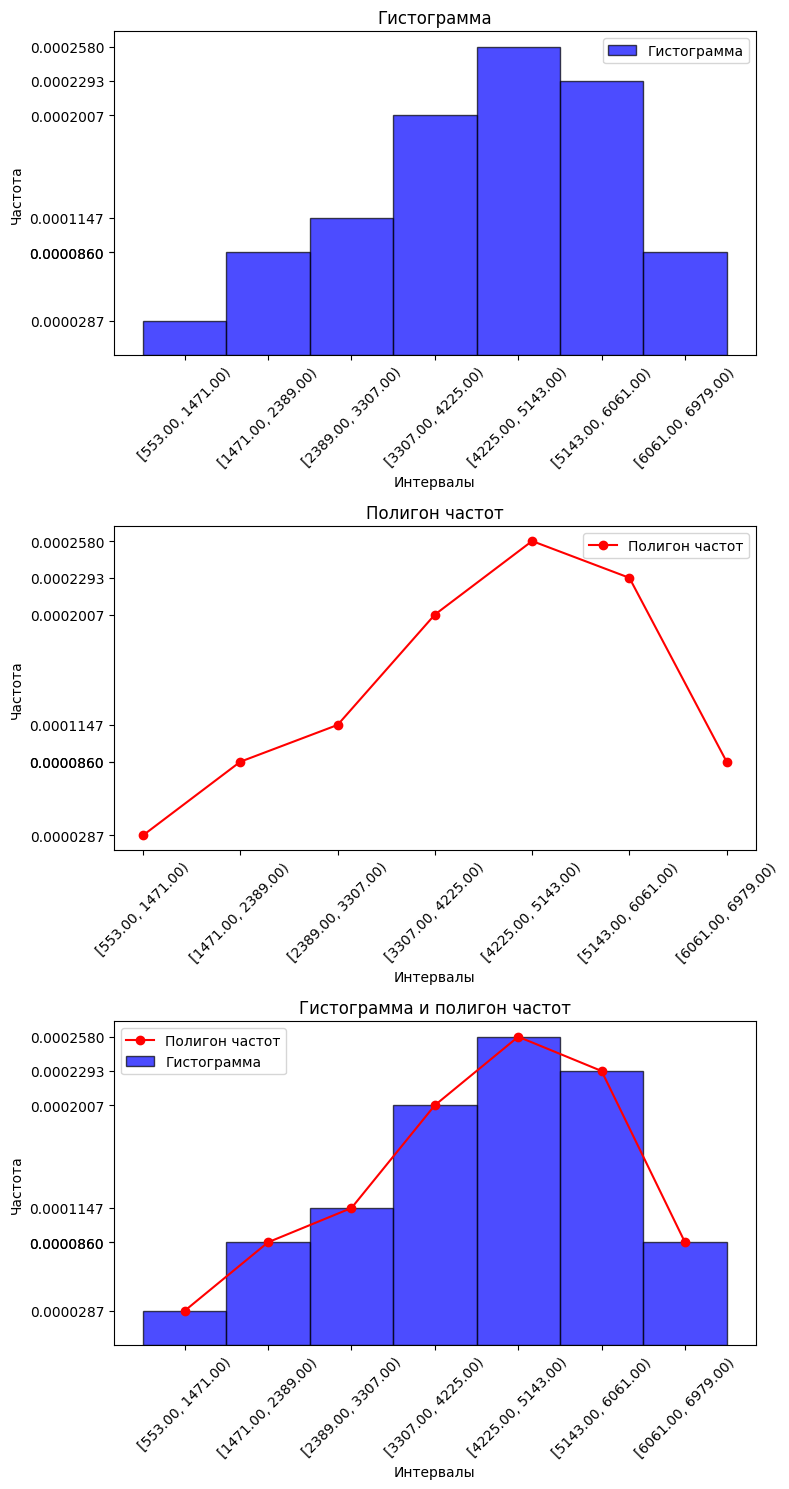

In [154]:
midpoints = [(intervals[i] + intervals[i + 1]) / 2 for i in range(m)]

fig, axes = plt.subplots(3, 1, figsize=(8, 15))

axes[0].bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
    
)
axes[0].set_xticks(midpoints)
axes[0].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[0].set_yticks(interval_table['ni/(n*h)'])
axes[0].set_xlabel('Интервалы')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма')
axes[0].legend()

axes[1].plot(
    midpoints,
    interval_table['ni/(n*h)'],
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[1].set_xticks(midpoints)
axes[1].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[1].set_yticks(interval_table['ni/(n*h)'])
axes[1].set_xlabel('Интервалы')
axes[1].set_ylabel('Частота')
axes[1].set_title('Полигон частот')
axes[1].legend()

axes[2].bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
)
axes[2].plot(
    midpoints,
    interval_table['ni/(n*h)'],
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[2].set_xticks(midpoints)
axes[2].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[2].set_yticks(interval_table['ni/(n*h)'])
axes[2].set_xlabel('Интервалы')
axes[2].set_ylabel('Частота')
axes[2].set_title('Гистограмма и полигон частот')
axes[2].legend()

plt.tight_layout()

plt.show()

# 4. Построить график эмпирической функции распределения

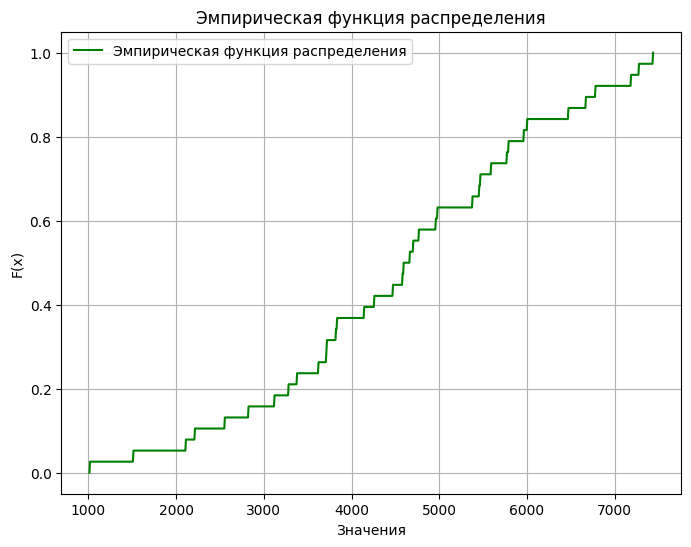

In [155]:
def empirical_distribution_function(x, data):
    return np.sum(np.array(data) <= x) / len(data)

x_values = np.linspace(x_min - 1, x_max + 1, 1000)
y_values = [empirical_distribution_function(x, variation_series) for x in x_values]

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Эмпирическая функция распределения', color='green')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.title('Эмпирическая функция распределения')
plt.legend()
plt.grid(True)
plt.show()

# 5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.

In [156]:
sample_mean = sum(data)/len(data)
sample_variance = sum((x - sample_mean) ** 2 for x in data) / (n - 1)
mode, mode_count = Counter(data).most_common(1)[0]
if n % 2 == 0:
    median = (variation_series[n//2 - 1] + variation_series[n//2]) / 2
else:
    median = variation_series[n//2]
skewness = pd.Series(data).skew()
kurtosis = pd.Series(data).kurtosis()

print(f"Выборочное среднее: {sample_mean}")
print(f"Исправленная выборочная дисперсия: {sample_variance}")
print(f"Мода: {mode}, встречается {mode_count} раз")
print(f"Медиана: {median}")
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")

Выборочное среднее: 4578.921052631579
Исправленная выборочная дисперсия: 2581019.10170697
Мода: 1012, встречается 1 раз
Медиана: 4626.5
Асимметрия: -0.18775512904775002
Эксцесс: -0.43181580699785815


# 6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
На основе анализа гистограммы и эмпирической функции распределения предполагаем, что генеральная совокупность имеет нормальное распределение с параметрами, близкими к выборочному среднему ≈ 19.385 и исправленной дисперсии ≈ 1.090. Однако положительные значения асимметрии 1.589 и эксцесса 3.003 указывают на отклонение от симметрии и более острый пик, что может свидетельствовать о смещенном нормальном распределении или логарифмически нормальном распределении. Для подтверждения гипотезы требуется проверка критерием Пирсона.

# 7. Найти оценки параметров предполагаемого распределения генеральной совокупности.

In [157]:
mu = sample_mean
sigma = np.sqrt(sample_variance)
print("7. Оценки параметров:")
print(f"μ = {mu:.4f}")
print(f"σ = {sigma:.4f}")

7. Оценки параметров:
μ = 4578.9211
σ = 1606.5550


# 8 Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).


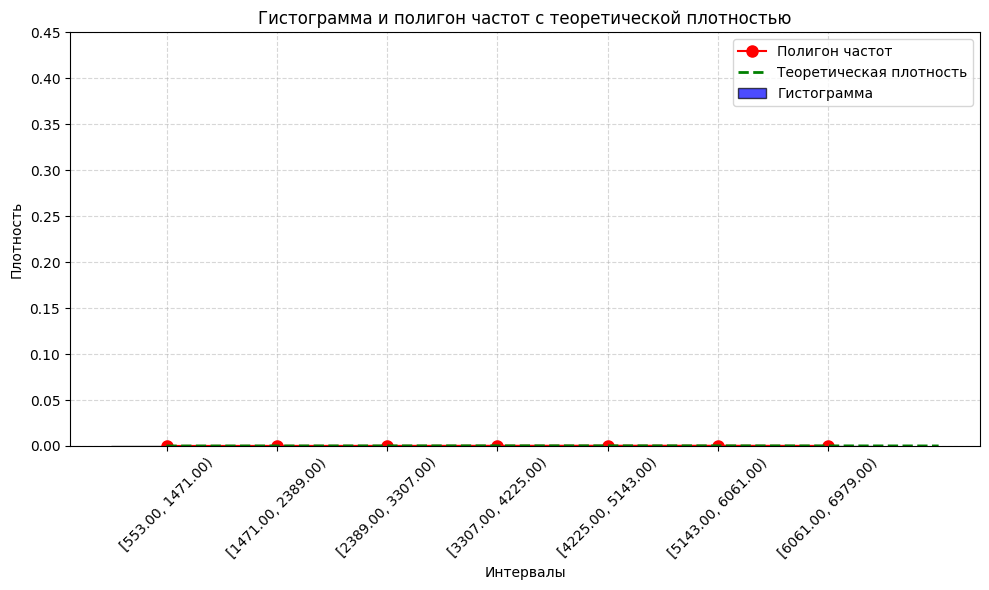

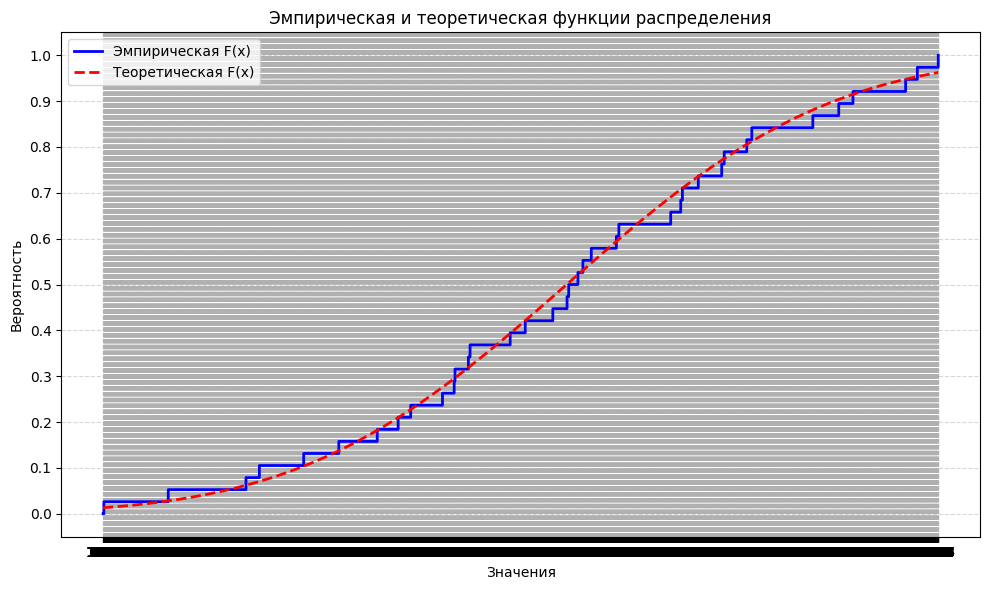

In [158]:
plt.figure(figsize=(10, 6))

plt.bar(
    midpoints,
    interval_table['ni/(n*h)'],
    width=h,
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
)

plt.plot(
    midpoints,
    interval_table['ni/(n*h)'],
    marker='o',
    linestyle='-',
    color='red',
    markersize=8,
    label='Полигон частот'
)

x_theor = np.linspace(x_min-1, x_max+1, 500)
pdf = stats.norm.pdf(x_theor, mu, sigma)
plt.plot(
    x_theor, 
    pdf, 
    color='green', 
    linewidth=2, 
    linestyle='--',
    label='Теоретическая плотность'
)

plt.xticks(midpoints, [f"[{intervals[i]:.2f}, {intervals[i+1]:.2f})" for i in range(m)], rotation=45)
plt.yticks(np.arange(0, 0.5, 0.05))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Интервалы')
plt.ylabel('Плотность')
plt.title('Гистограмма и полигон частот с теоретической плотностью')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.step(
    x_values, 
    y_values, 
    where='post',
    color='blue',
    linewidth=2,
    label='Эмпирическая F(x)'
)

cdf = stats.norm.cdf(x_values, mu, sigma)
plt.plot(
    x_values, 
    cdf, 
    color='red',
    linewidth=2,
    linestyle='--',
    label='Теоретическая F(x)'
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Значения')
plt.ylabel('Вероятность')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.xticks(np.arange(np.floor(x_min-1), np.ceil(x_max+1)+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

# 9 Проверить выполнение правила «трех сигма».

In [159]:
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma
count_within_3sigma = sum((lower_bound <= x <= upper_bound) for x in data)
percentage_within = (count_within_3sigma / n) * 100

print("\n9. Проверка правила трёх сигм:")
print(f"Интервал [μ ± 3σ]: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Число значений в интервале: {count_within_3sigma} из {n} ({percentage_within:.2f}%)")
print("Правило выполняется приближённо." if percentage_within > 95 else "Правило нарушено.")


9. Проверка правила трёх сигм:
Интервал [μ ± 3σ]: [-240.74, 9398.59]
Число значений в интервале: 38 из 38 (100.00%)
Правило выполняется приближённо.


# 10 Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.

In [160]:
import scipy.stats as stats

# Вычисление теоретических вероятностей для каждого интервала
probs = []
for i in range(m):
    a = intervals[i]
    b = intervals[i+1]
    prob = stats.norm.cdf(b, loc=mu, scale=sigma) - stats.norm.cdf(a, loc=mu, scale=sigma)
    probs.append(prob)

theoretical_counts = [p * n for p in probs]

# Объединение интервалов с теоретическими частотами <5
merged_observed = []
merged_expected = []
current_obs = 0
current_exp = 0

for i in range(m):
    current_obs += interval_counts[i]
    current_exp += theoretical_counts[i]
    if current_exp >= 5 or i == m-1:
        merged_observed.append(current_obs)
        merged_expected.append(current_exp)
        current_obs = 0
        current_exp = 0

# Удаление нулевых интервалов (если возникли)
merged_observed = [x for x in merged_observed if x != 0]
merged_expected = [x for x in merged_expected if x != 0]

# Расчет хи-квадрат статистики
chi2_stat = 0
for obs, exp in zip(merged_observed, merged_expected):
    chi2_stat += (obs - exp)**2 / exp

# Степени свободы
k = len(merged_observed) - 3  # m_merged - 3 (оценено два параметра)
alpha_chi2 = 0.05
critical_value = stats.chi2.ppf(1 - alpha_chi2, k)

print(f"10. Критерий Пирсона:")
print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
print(f"Критическое значение: {critical_value:.4f}")
print(f"Число степеней свободы: {k}")
if chi2_stat < critical_value:
    print("Гипотеза о нормальном распределении принимается.")
else:
    print("Гипотеза о нормальном распределении отвергается.")

10. Критерий Пирсона:
Хи-квадрат статистика: 0.5475
Критическое значение: 5.9915
Число степеней свободы: 2
Гипотеза о нормальном распределении принимается.


# 11 Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.